In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Import Package

In [ ]:
import cv2
import numpy as np
import pywt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import os

#Load Data

In [ ]:

# Path direktori gambar guava mentah dan matang
raw_dir = '/content/drive/MyDrive/dataset guava/Green'
rawripe_dir = '/content/drive/MyDrive/dataset guava/Mature Green'
ripe_dir = '/content/drive/MyDrive/dataset guava/ripe'

# Load dataset guava mentah
raw_images = []
for filename in os.listdir(raw_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Ubah ekstensi gambar jika diperlukan
        raw_images.append(os.path.join(raw_dir, filename))


rawripe_images = []
for filename in os.listdir(rawripe_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Ubah ekstensi gambar jika diperlukan
        rawripe_images.append(os.path.join(rawripe_dir, filename))


# Load dataset guava matang
ripe_images = []
for filename in os.listdir(ripe_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Ubah ekstensi gambar jika diperlukan
        ripe_images.append(os.path.join(ripe_dir, filename))

#Fungsi untuk Ekstraksi Feature

In [ ]:

# Fungsi untuk mengekstrak fitur wavelet menggunakan DWT
def extract_wavelet_features(image):

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    coeffs = pywt.dwt2(gray_image, 'haar')
    LL, (LH, HL, HH) = coeffs

    features = np.concatenate([HL.flatten(), HH.flatten()])
    return features

# Fungsi untuk mengekstrak histogram warna
def extract_color_histogram(image):
    hist_r, _ = np.histogram(image[:, :, 0], bins=256, range=[0, 256])
    hist_g, _ = np.histogram(image[:, :, 1], bins=256, range=[0, 256])
    hist_b, _ = np.histogram(image[:, :, 2], bins=256, range=[0, 256])

    color_features = np.concatenate([hist_r, hist_g, hist_b])
    return color_features


#Ekstraksi Fitur


In [ ]:
# Mengekstrak fitur dari gambar mentah dan matang
raw_features = []
rawripe_features =[]
ripe_features = []

for raw_image_path in raw_images:
    raw_image = cv2.imread(raw_image_path)
    raw_wavelet_features = extract_wavelet_features(raw_image)
    raw_color_features = extract_color_histogram(raw_image)
    raw_features.append(np.concatenate([raw_wavelet_features, raw_color_features]))

for rawripe_image_path in rawripe_images:
    rawripe_image = cv2.imread(rawripe_image_path)
    rawripe_wavelet_features = extract_wavelet_features(rawripe_image)
    rawripe_color_features = extract_color_histogram(rawripe_image)
    rawripe_features.append(np.concatenate([rawripe_wavelet_features, rawripe_color_features]))

for ripe_image_path in ripe_images:
    ripe_image = cv2.imread(ripe_image_path)
    ripe_wavelet_features = extract_wavelet_features(ripe_image)
    ripe_color_features = extract_color_histogram(ripe_image)
    ripe_features.append(np.concatenate([ripe_wavelet_features, ripe_color_features]))

# Menggabungkan fitur dan label untuk pembelajaran mesin
features = np.vstack([raw_features,rawripe_features, ripe_features])
labels = np.concatenate([np.zeros(len(raw_features)), np.ones(len(rawripe_features)), np.full(len(ripe_features), 2)])

#Training

In [ ]:
# Membagi dataset menjadi subset pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Pelatihan model SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # Ubah parameter sesuai kebutuhan

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Memprediksi kelas guava pada subset pengujian
y_pred = svm_model.predict(X_test)

# Mengukur akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))


Akurasi: 94.12%


#Predict

In [ ]:
new_image = cv2.imread('/content/drive/MyDrive/dataset guava/test/mature green.jpg')  # Load the new image
new_wavelet_features = extract_wavelet_features(new_image)
new_color_features = extract_color_histogram(new_image)
new_features = np.concatenate([new_wavelet_features, new_color_features])

In [ ]:
svm_model.predict([new_features])

array([1.])

#Visualize DWT

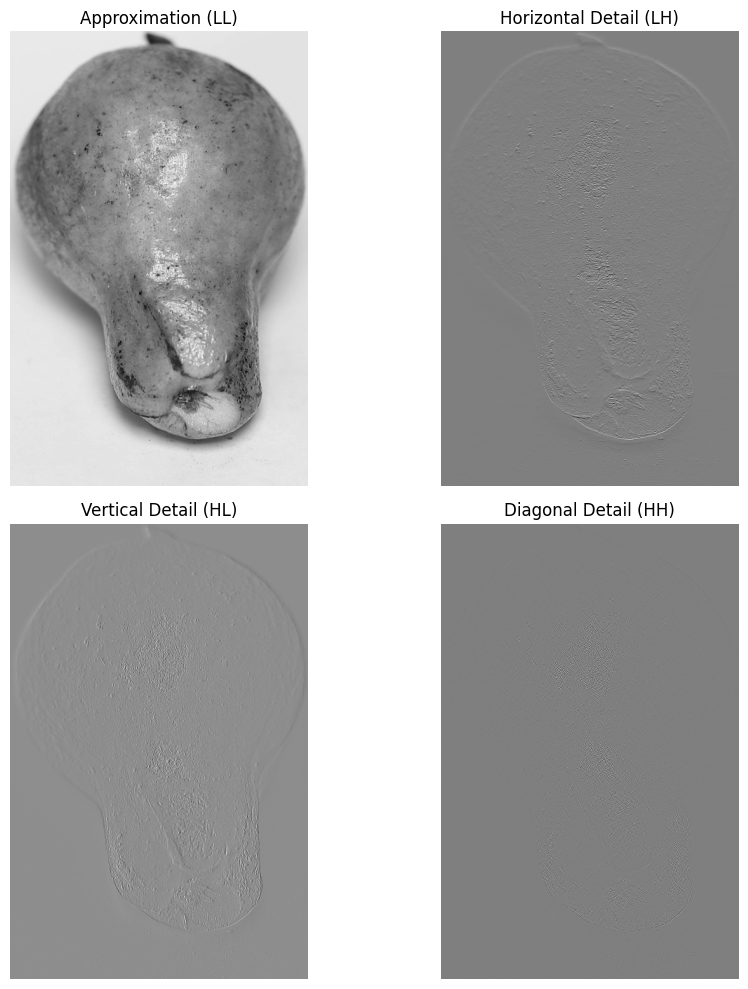

In [ ]:
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("/content/drive/MyDrive/dataset guava/Green/1.jpg")

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform the DWT on the image using the desired wavelet method
coeffs = pywt.dwt2(gray_image, 'haar')
LL, (LH, HL, HH) = coeffs

# Plot the wavelet coefficients
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(LL, cmap='gray')
plt.title('Approximation (LL)')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(LH, cmap='gray')
plt.title('Horizontal Detail (LH)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(HL, cmap='gray')
plt.title('Vertical Detail (HL)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(HH, cmap='gray')
plt.title('Diagonal Detail (HH)')
plt.axis('off')

plt.tight_layout()
plt.show()


#Visualize Histogram

In [ ]:
hist_r, _ = np.histogram(image[:, :, 0], bins=256, range=[0, 256])
hist_g, _ = np.histogram(image[:, :, 1], bins=256, range=[0, 256])
hist_b, _ = np.histogram(image[:, :, 2], bins=256, range=[0, 256])


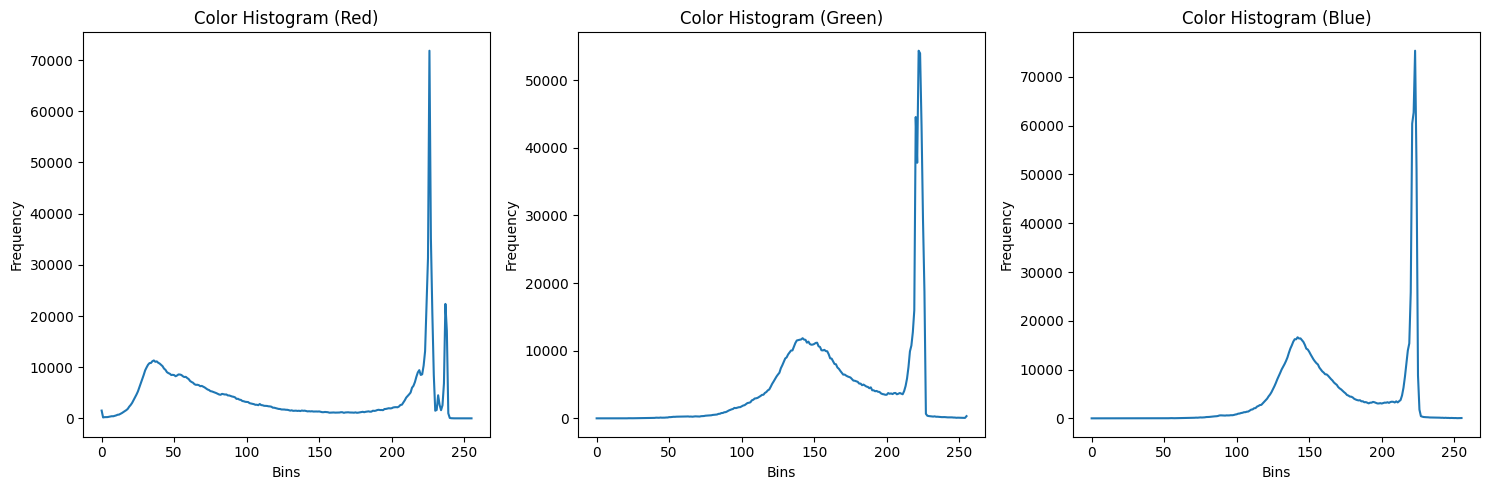

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title('Color Histogram (Red)')
plt.plot(hist_r)
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.title('Color Histogram (Green)')
plt.plot(hist_g)
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.title('Color Histogram (Blue)')
plt.plot(hist_b)
plt.xlabel('Bins')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()